In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras import datasets

In [5]:
def DNN_ModelSequential(n_input, n_hidden, n_hidden2, n_out):
  model = Sequential()
  model.add(Dense(n_hidden, input_shape=(n_input,), activation='relu'))
  model.add(Dense(n_hidden2, activation='relu'))
  model.add(Dense(n_out, activation='softmax')) 

  opt = Adam(lr=0.01)
  model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [6]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


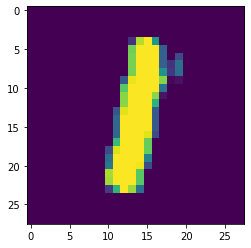

1
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  36 225 254 135   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 199 253 253 252  76
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 202 253 253 253  78
    0  58   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 202 253 253 253  78
   37  94   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 202 253 

In [8]:
mySample = np.random.randint(60000)
plt.imshow(X_train[mySample])
plt.show()
print(Y_train[mySample])
print(X_train[mySample])

In [9]:
def Data_func():
  (X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
  Y_train = np_utils.to_categorical(Y_train)
  Y_test = np_utils.to_categorical(Y_test)
  L, W, H = X_train.shape
  X_train = X_train.reshape(-1, W * H)
  X_test = X_test.reshape(-1, W * H)
  X_train = X_train / 255
  X_test = X_test / 255
  return (X_train, Y_train), (X_test, Y_test)

In [10]:
model = DNN_ModelSequential(784, 128, 128, 10)
(x_train, y_train), (x_test, y_test) = Data_func()
print(model.summary())
print(x_train.shape, y_train.shape)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None
(60000, 784) (60000, 10)


In [11]:
fit_hist = model.fit(x_train, y_train, epochs=15, batch_size=128, 
                     validation_split=0.2)
performance_test = model.evaluate(x_test, y_test, batch_size=128)
print('test Loss Accurecy -> ',performance_test)

Epoch 1/15
375/375 [==============================] - 3s 5ms/step - loss: 0.2474 - accuracy: 0.9235 - val_loss: 0.1431 - val_accuracy: 0.9579
Epoch 2/15
375/375 [==============================] - 2s 4ms/step - loss: 0.1321 - accuracy: 0.9596 - val_loss: 0.1383 - val_accuracy: 0.9608
Epoch 3/15
375/375 [==============================] - 2s 4ms/step - loss: 0.1066 - accuracy: 0.9683 - val_loss: 0.1486 - val_accuracy: 0.9588
Epoch 4/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0929 - accuracy: 0.9728 - val_loss: 0.1414 - val_accuracy: 0.9641
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0861 - accuracy: 0.9755 - val_loss: 0.1641 - val_accuracy: 0.9599
Epoch 6/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0887 - accuracy: 0.9751 - val_loss: 0.1601 - val_accuracy: 0.9603
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0704 - accuracy: 0.9795 - val_loss: 0.1548 - val_accuracy: 0.9690
Epoch 

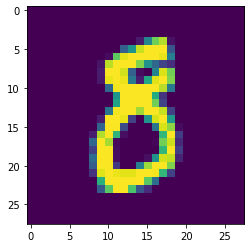

8
8


In [21]:
mySample = np.random.randint(10000)
plt.imshow(X_test[mySample])
plt.show()
print(Y_test[mySample])
pred = model.predict(x_test[mySample].reshape(-1,784))
print(np.argmax(pred))

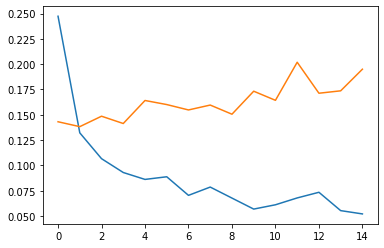

In [22]:
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

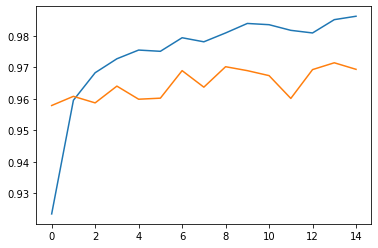

In [23]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()